<a href="https://colab.research.google.com/github/Jeanneweb1204/Learning-Styles-Quiz/blob/master/L8_Introduction_to_Python_Homework_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("corrieaar/apartment-rental-offers-in-germany")

print("Path to dataset files:", path)

100%|██████████| 93.0M/93.0M [00:00<00:00, 130MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/corrieaar/apartment-rental-offers-in-germany/versions/6


# **Apartment cost and sizes in Germany**

**Where is the data from?**

The data was scraped from Immoscout24, the biggest real estate platform in Germany. Immoscout24 has listings for both rental properties and homes for sale, however, the data only contains offers for rental properties.
The scraping process is described in this blog post and the corresponding code for scraping and minimal processing afterwards can be found in this Github repo.
At a given time, all available offers were scraped from the site and saved. This process was repeated three times, so the data set contains offers from the dates 2018-09-22, 2019-05-10 and 2019-10-08.

**Content**

The data set contains most of the important properties, such as living area size, the rent, both base rent as well as total rent (if applicable), the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc. The date column was added to give the time of scraping.

**Inspiration**

Did rents increase over time? Which areas are the most expensive? Which areas saw the largest increase, which areas became cheaper? Are there any duplicates? How many? What could be gained from a text analysis of the free text variables?

**Acknowledgements**

The data belongs to www.immobilienscount24.de and is for research purposes only. The data was created with .


**Here you can find the data -->**

https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/corrieaar/apartment-rental-offers-in-germany/versions/6/immo_data.csv")
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


**Task 1: What kind of information do we have?**

Do the following tasks:

* Use .shape, .info(), .describe(), .head()
* Select row with indexes 250:260 of column indexes 3 and 4
* Select row with indexes 252, 253, 257 of column indexes 1, 3, 5

In [38]:

print("\nInfo about the DataFrame:")
df_info=df.info()
df_info

print("\nFirst 5 rows of the DataFrame:")
df_head=df.head()
df_head


Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces     

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [39]:
df_describe=df.describe()
df_describe

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [40]:
df_iloc=df.iloc[250:260,3:4]
df_iloc

,telekomTvOffer
250,ONE_YEAR_FREE
251,ONE_YEAR_FREE
252,NaN
253,ONE_YEAR_FREE
254,NaN
255,NaN
256,ONE_YEAR_FREE
257,ONE_YEAR_FREE
258,ONE_YEAR_FREE
259,ONE_YEAR_FREE


In [41]:
df_iloc2=df.iloc[[ 252, 253, 257], [1,3,5]]
df_iloc2

,serviceCharge,telekomTvOffer,newlyConst
252,85.0,NaN,True
253,NaN,ONE_YEAR_FREE,False
257,200.0,ONE_YEAR_FREE,False


**Task 2: In what conditions are the flats?**

In [59]:
print("Condition of the apartements")
df_condition=df["condition"].value_counts()
df_condition

Condition of the apartements


,count
condition,
well_kept,66591
refurbished,26964
fully_renovated,26368
first_time_use,21959
mint_condition,21938
modernized,17226
first_time_use_after_refurbishment,15699
negotiable,2240
need_of_renovation,1372


**Task 3: What is the range of total rent?**

In [58]:
print("Range of total rent")
df_rent=df["totalRent"].describe()
df_rent

Range of total rent


,totalRent
count,2.283330e+05
mean,9.013315e+02
std,3.323833e+04
min,0.000000e+00
25%,4.698000e+02
50%,6.500000e+02
75%,9.850000e+02
max,1.575154e+07


**Task 4: How many apartments are available per city?**

In [57]:
## Apartment available per city
print("Apartement available per City")
df_city=df["regio1"].value_counts()
df_city

Apartement available per City


,count
regio1,
Nordrhein_Westfalen,62863
Sachsen,58154
Bayern,21609
Sachsen_Anhalt,20124
Hessen,17845
Niedersachsen,16593
Baden_Württemberg,16091
Berlin,10406
Thüringen,8388


**Task 5: Where is the largest apartment available and where is the smallest and what are their costs?**

In [71]:
## Cleaning data before
df_clean = df[(df["livingSpace"] > 0) & (df["livingSpace"] < 1000)]

print(" Largest apartment:")
df_loc_max = df_clean.loc[df_clean["livingSpace"] == df_clean["livingSpace"].max(), ["regio2", "livingSpace", "totalRent"]]
print(df_loc_max)

print("Smallest apartment:")
df_loc_min = df_clean.loc[df_clean["livingSpace"] == df_clean["livingSpace"].min(), ["regio2", "livingSpace", "totalRent"]]
print(df_loc_min)


 Largest apartment:
       regio2  livingSpace  totalRent
12420  Bremen        649.0      720.0
Smallest apartment:
                         regio2  livingSpace  totalRent
7775        Aschaffenburg_Kreis          1.0     1280.0
9343            Paderborn_Kreis          1.0      795.0
20520                   Dresden          1.0       56.5
46901                Düsseldorf          1.0        NaN
82753                Leer_Kreis          1.0       10.0
85233                   Leipzig          1.0       15.0
102062                 Eisenach          1.0        NaN
136607               Leer_Kreis          1.0       10.0
150667  Märkisch_Oderland_Kreis          1.0        NaN
163563              Kusel_Kreis          1.0      550.0
167330            Rastatt_Kreis          1.0      250.0
167446           Freising_Kreis          1.0      485.0
168147           Northeim_Kreis          1.0        NaN
207745                Bielefeld          1.0        NaN
213666               Leer_Kreis          1.0

**Task 6: Plot an appropriate chart (pie or bar) to visualise the number of apartments in each state of Germany**

Number of apartement in each state of Germany by bar


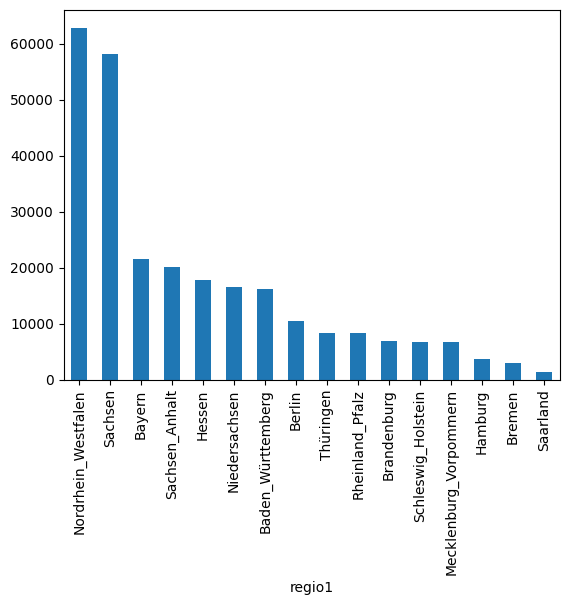

Number of apartement in each state of Germany by pie


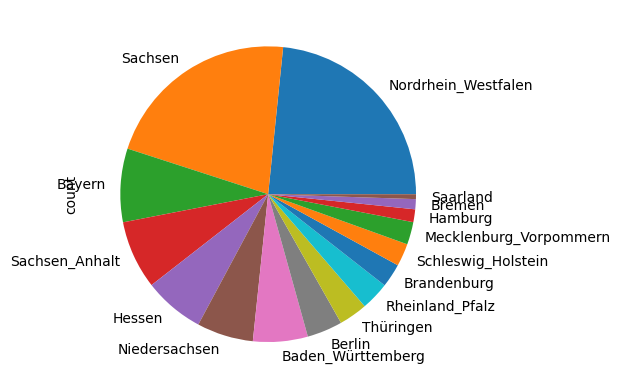

In [69]:
print("Number of apartement in each state of Germany by bar")
df_state=df['regio1'].value_counts()
df_state.plot(kind='bar')
plt.show()
print("Number of apartement in each state of Germany by pie")
df_state.plot(kind='pie')
plt.show()

**Task 7: What is the range of number of rooms available?**

In [70]:
print("Range of number of rooms available")
df_room=df['livingSpaceRange'].describe()
df_room

Range of number of rooms available


,livingSpaceRange
count,268850.000000
mean,3.070790
std,1.407127
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


**General Question**

Based on all the above tasks and methods that you applied on the dataset, what can you say about the data?

* What information is the dataset trying to give you?
* Is the dataset complete? How would you define a data to be complete?
* What are the general trends showing in the dataset?

based on information of the dataset ,it is about rental apartments in Germany.

The dataset is not complete because there are some missing rent prices (NaN values),and for the Task 5 when i was trying to run the code they were some unrealistic value like "livingspace"=0 i had to clean first

the major dataset is showing tha the highest number of apartement are located  Nordrhein Westfalen,Sachsen,followed by other region like Bayern,Sachsen Anhalt,Hessen,...

According to the condition of apartement most of them are well Kept , few of them need renovation ,less than 5 are set to be demolished